<a href="https://colab.research.google.com/github/mvoassis/CIC-DDoS2019-DeepLearning/blob/main/notebooks/Brazil_Breast_Cancer_Treatment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brazil - Breast Cancer Treatment analysis
> Marcos V. O. Assis (mvoassis@gmail.com)

In [1]:
import pandas as pd
import numpy as np

In [2]:
main_df = pd.read_csv('cancer_mama_12_22.csv')

<ipython-input-2-4545a8647880>:1: DtypeWarning: Columns (3,30,39) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('cancer_mama_12_22.csv')


In [3]:
main_df.head()

,Unnamed: 0,TPCASO,SEXO,IDADE,LOCALNAS,RACACOR,INSTRUC,CLIATEN,CLITRAT,HISTFAMC,...,UFUH,MUUH,OCUPACAO,DTDIAGNO,DTTRIAGE,DATAPRICON,DATAINITRT,DATAOBITO,VALOR_TOT,BASDIAGSP
0,7,2,2,45,MG,1,6,31,31,2,...,MG,3151800,141,26/07/2011,29/03/2012,29/03/2012,09/04/2012,/ /,1,3
1,14,1,2,48,PA,4,9,17,23,9,...,PA,1506807,9999,02/01/2012,17/01/2012,17/01/2012,09/02/2012,/ /,1,3
2,17,1,2,56,PB,1,2,9,9,9,...,PB,2504009,621,03/01/2012,04/01/2012,08/01/2012,07/03/2012,/ /,1,2
3,18,1,2,69,RS,1,9,0,33,9,...,RS,4314902,999,13/07/2012,/ /,15/05/2012,22/08/2012,/ /,1,3
4,19,1,2,64,RS,1,9,0,24,9,...,RS,4314902,999,25/12/2011,/ /,10/02/2012,22/02/2012,/ /,1,3


## Some basic EDA

In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424672 entries, 0 to 424671
Data columns (total 47 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  424672 non-null  int64  
 1   TPCASO      424672 non-null  int64  
 2   SEXO        424672 non-null  int64  
 3   IDADE       424672 non-null  object 
 4   LOCALNAS    424672 non-null  object 
 5   RACACOR     424672 non-null  int64  
 6   INSTRUC     424672 non-null  int64  
 7   CLIATEN     424672 non-null  int64  
 8   CLITRAT     424672 non-null  int64  
 9   HISTFAMC    424672 non-null  int64  
 10  ALCOOLIS    424672 non-null  int64  
 11  TABAGISM    424672 non-null  int64  
 12  ESTADRES    424672 non-null  object 
 13  PROCEDEN    424654 non-null  float64
 14  ANOPRIDI    424667 non-null  float64
 15  ORIENC      424672 non-null  int64  
 16  EXDIAG      246236 non-null  float64
 17  ESTCONJ     424672 non-null  int64  
 18  ANTRI       292558 non-null  float64
 19  DT

In [ ]:
for coluna in main_df.columns:
    print('Col: ', coluna)
    print(main_df[coluna].unique())
    print('----------\n')

## Some basic data treatment

In [6]:
main_df = main_df[main_df['IDADE']!='0-1']

In [7]:
main_df = main_df[~main_df['ANOPRIDI'].isna()]

In [8]:
colunas_conv_diretas = ['TPCASO', 'IDADE', 'ANOPRIDI', 'DTPRICON']

for coluna in colunas_conv_diretas:
    print(coluna)
    print()
    main_df[coluna] = pd.to_numeric(main_df[coluna], errors='coerce', downcast='integer')


TPCASO

IDADE



<ipython-input-8-010cac2a181f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[coluna] = pd.to_numeric(main_df[coluna], errors='coerce', downcast='integer')


ANOPRIDI

DTPRICON



## Organizing data needed for the Hypothesis test

In [9]:
main_df.groupby('DTPRICON')[['TPCASO']].count()

,TPCASO
DTPRICON,
2012,40939
2013,45362
2014,45641
2015,45235
2016,46656
2017,47863
2018,47421
2019,47294
2020,36839


In [10]:
anos = [ano for ano in range(2012,2023)]
main_df_filtrado = main_df[main_df['ANOPRIDI'].isin(anos)]

In [11]:
diagnosticos_por_ano = main_df_filtrado.groupby('ANOPRIDI')[['TPCASO']].count()
diagnosticos_por_ano.columns = ['DIAGNOSTICOS']
diagnosticos_por_ano

,DIAGNOSTICOS
ANOPRIDI,
2012,39632
2013,43624
2014,45018
2015,43728
2016,45544
2017,45508
2018,44876
2019,43401
2020,30213


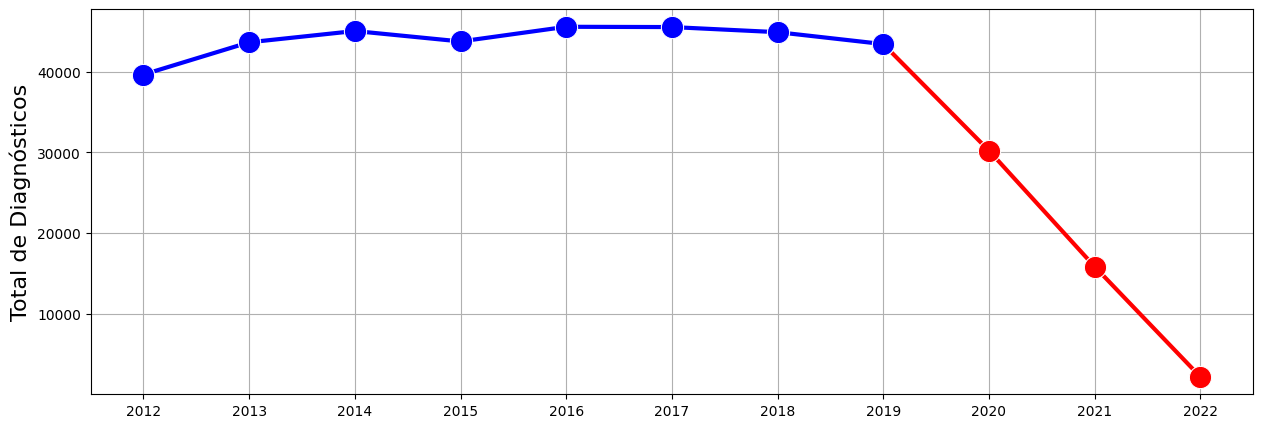

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(15,5))
sns.lineplot(x=diagnosticos_por_ano.index[7:], y=diagnosticos_por_ano['DIAGNOSTICOS'].iloc[7:],
             marker='o', linewidth=3, markersize=16, color='r')
sns.lineplot(x=diagnosticos_por_ano.index[:8], y=diagnosticos_por_ano['DIAGNOSTICOS'].iloc[:8],
             marker='o', linewidth=3, markersize=16, color='b')

plt.grid(True)
plt.xticks(diagnosticos_por_ano.index)
plt.xlabel('', fontsize=12)
plt.ylabel('Total de Diagnósticos', fontsize=16)
f.savefig('diagnosticos.png')

## Hypothesis test

- Null Hypothesis (H0): There is no significant difference in the averages between the amount of treatment in previous years (2017 to 2019) and during the pandemic (2020 to 2022).

- Alternative Hypothesis (H1): There is a significant difference in the averages between the amount of treatment in previous years (2017 to 2019) and during the pandemic (2020 to 2022).

Testing if the variances of the two groups are homogenous (to enable test-t usage)...


In [13]:
import numpy as np
from scipy import stats

# Data from the first 3 years (2017-2019)
primeiros_anos = np.array([45508, 44876, 43401])

# Data from the last 3 years (2020-2022)
ultimos_anos = np.array([30213, 15855, 2213])

# Performing the Levene test
statistic, p_value = stats.levene(primeiros_anos, ultimos_anos)

# Significance
alpha = 0.05

print("Levene statistics:", statistic)
print("P-value:", p_value)

if p_value > alpha:
    print("\nWe do not reject the null hypothesis. Variances are homogeneous.")
else:
    print("\nWe reject the null hypothesis. Variances are not homogeneous.")


Levene statistics: 3.3856307195479647
P-value: 0.13959708660307518

We do not reject the null hypothesis. Variances are homogeneous.


> Now, testing the normality of the data using Shapiro-Wilk test:

In [16]:
import numpy as np
from scipy import stats

primeiros_anos = np.array([45508, 44876, 43401])
ultimos_anos = np.array([30213, 15855, 2213])

# Perform the Shapiro-Wilk normality test
statistic1, p_value1 = stats.shapiro(primeiros_anos)
statistic2, p_value2 = stats.shapiro(ultimos_anos)

# Significance
alpha = 0.05

print("Shapiro-Wilk test for the 'primeiros_anos' group:")
print("Test Statistics:", statistic1)
print("P-value:", p_value1)

if p_value1 > alpha:
    print("We do not reject the null hypothesis. The data from the 'primeiros_anos' group are approximately normal.")
else:
    print("We reject the null hypothesis. The data in the 'primeiros_anos' group is not normally distributed.")

print("\nShapiro-Wilk test for the 'ultimos_anos' group:")
print("Test Statistics:", statistic2)
print("P-value:", p_value2)

if p_value2 > alpha:
    print("We do not reject the null hypothesis. The data from the 'ultimos_anos' group are approximately normal.")
else:
    print("We reject the null hypothesis. The data in the 'ultimos_anos' group is not normally distributed.")


Shapiro-Wilk test for the 'primeiros_anos' group:
Test Statistics: 0.9493443965911865
P-value: 0.5664374440149402
We do not reject the null hypothesis. The data from the 'primeiros_anos' group are approximately normal.

Shapiro-Wilk test for the 'ultimos_anos' group:
Test Statistics: 0.9997822046279907
P-value: 0.9718134795274831
We do not reject the null hypothesis. The data from the 'ultimos_anos' group are approximately normal.


> Now, performing the t-test...

In [15]:
import numpy as np
from scipy import stats

# Data from the first 3 years (2017-2019)
primeiros_anos = np.array([45508, 44876, 43401])

# Data from the last 3 years (2020-2022)
ultimos_anos = np.array([30213, 15855, 2213])

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(primeiros_anos, ultimos_anos)

# Significance
alpha = 0.05

print(f"t statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("\nWe reject the null hypothesis.")
else:
    print("\nWe do not reject the null hypothesis.")


t statistic: 3.5152753718004743
P-value: 0.02455457358991802

We reject the null hypothesis.
